Title: A prediction of the presence of heart disease using age, sex, serum cholesterol levels, resting blood pressure, and maximum heart rate variables in patients in Cleveland and Switzerland using the Heart Disease dataset

Introduction:

In recent years, numerous studies have been conducted to evaluate the variables that might contribute to increasing the risk of heart disease in humans. Some variables that were studied before include high cholesterol levels which can create clots in the blood vessels, high blood pressure that can cause heart attacks, consistently increased heart rate that can cause ischaemic heart disease, and other factors like age and sex (1). The Heart Disease dataset (2) provides sets of information on heart disease data collection done in Cleveland, Hungary, Switzerland and the VA Long Beach. The study aimed to explore the relationships between 14 different attributed variables and the presence of heart disease. Using this dataset, we aim to predict the diagnosis of heart disease with a computerized model using an R system based on age, sex, serum cholesterol levels, resting blood pressure, and maximum heart rate in patients in Cleveland and Switzerland.

In [56]:
library(tidyverse)
library(tidymodels)
library(repr)
library(cowplot)

In [57]:
cleveland <- read_csv("https://raw.githubusercontent.com/Kooriryuu/dsci-100-project-group3/main/data/cleveland.data", col_names = FALSE, na = c("?"))
switzerland <- read_csv("https://raw.githubusercontent.com/Kooriryuu/dsci-100-project-group3/main/data/switzerland.data", col_names = FALSE, na = c("?"))
#cleveland <- read_csv("data/cleveland.data", col_names = FALSE, na = c("?"))
#switzerland <- read_csv("data/switzerland.data", col_names = FALSE, na = c("?"))

#cleveland
#switzerland

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 123 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [58]:
cleveland_select <- cleveland |>
    select(X1, X2, X5, X4, X8, X9, X14)
switzerland_select <- switzerland |>
    select(X1, X2, X5, X4, X8, X9, X14)
column_names <- c('age', "sex", "serum_cholesterol", "resting_blood_pressure", "max_heart_rate",'exang', "heart_disease_present")
colnames(cleveland_select) <- column_names
colnames(switzerland_select) <- column_names

cleveland_select$heart_disease_present[cleveland_select$heart_disease_present >= 1] <- "Yes"
cleveland_select$exang[cleveland_select$exang >= 1] <- "Yes"
switzerland_select$heart_disease_present[switzerland_select$heart_disease_present >= 1] <- "Yes"
switzerland_select$exang[switzerland_select$exang >= 1] <- "Yes"

cleveland_select$heart_disease_present[cleveland_select$heart_disease_present == 0] <- "No"
cleveland_select$exang[cleveland_select$exang == 0] <- "No"
switzerland_select$heart_disease_present[switzerland_select$heart_disease_present == 0] <- "No"
switzerland_select$exang[switzerland_select$exang == 0] <- "No"
all_places <- rbind(cleveland_select, switzerland_select)
all_places_select <- mutate(all_places, sex = as_factor(sex), exang= as_factor(exang), heart_disease_present = as_factor(heart_disease_present))
all_places_select

age,sex,serum_cholesterol,resting_blood_pressure,max_heart_rate,exang,heart_disease_present
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
63,1,233,145,150,No,No
67,1,286,160,108,Yes,Yes
67,1,229,120,129,Yes,Yes
37,1,250,130,187,No,No
41,0,204,130,172,No,No
56,1,236,120,178,No,No
62,0,268,140,160,No,Yes
57,0,354,120,163,Yes,No
63,1,254,130,147,No,Yes


In [59]:
set.seed(77777) 
places_split <- initial_split(all_places_select, prop = 0.75, strata = heart_disease_present)
places_training <- training(places_split) 
places_testing <- testing(places_split) 



In [60]:
avg <-  places_training |>
    select(age, serum_cholesterol, resting_blood_pressure) |>
    map_df(mean, na.rm = TRUE) |>
    mutate(age_avg = age, serum_cholesterol_avg = serum_cholesterol, resting_bp_avg = resting_blood_pressure) |>
    select(age_avg, serum_cholesterol_avg, resting_bp_avg)

count0 <- places_training |>
    filter(heart_disease_present == "No") |>
    count() |>
    pull()
count1 <- places_training |>
    filter(heart_disease_present == "Yes") |>
    count() |>
    pull()
avg <- avg |>
    mutate(num_people_no_disease = count0) |>
    mutate(num_people_w_disease = count1)
countM <- places_training |>
    filter(sex == 1) |>
    count() |>
    pull()
countF <- places_training |>
    filter(sex == 0) |>
    count() |>
    pull()
avg <- avg |>
    mutate(num_females = countF, num_males = countM, num_missing_data= sum(is.na(places_training)))
#cleveland_training
avg
#count

exang<- all_places_select|> filter (!is.na (exang)) 

age_avg,serum_cholesterol_avg,resting_bp_avg,num_people_no_disease,num_people_w_disease,num_females,num_males,num_missing_data
<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
54.52038,178.7179,130.3659,129,190,73,246,4


Warning message:
“Removed 2 rows containing missing values (geom_point).”


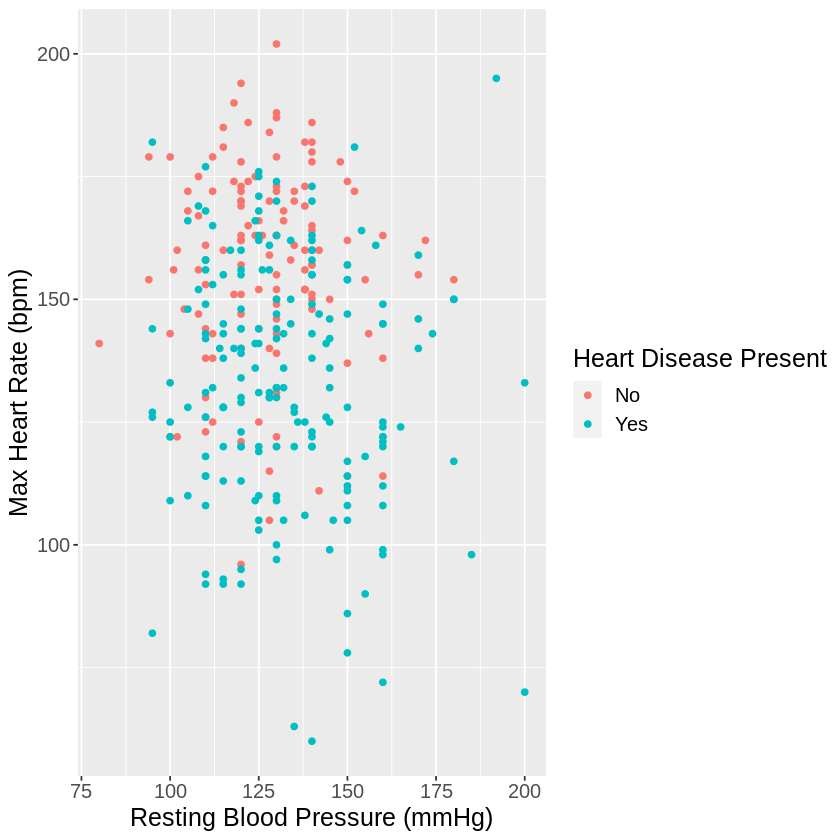

In [61]:
#all_places
distribution_plot <- ggplot(places_training, aes(x = resting_blood_pressure, y = max_heart_rate, colour = heart_disease_present)) +
    geom_point() +
    xlab("Resting Blood Pressure (mmHg)") +
    ylab("Max Heart Rate (bpm)") +
    labs(colour = "Heart Disease Present") +
    theme(text = element_text(size = 15))

distribution_plot

Methods:

First, we uploaded the dataset into our public GitHub repository and downloaded it into this R notebook through the GitHub link. Then, we read the dataset and selected the columns that we wanted to analyze. Out of the 14 variables, we are considering age, sex, resting blood pressure, serum cholesterol, maximum heart rate, and diagnoses of heart disease. Below is a guide to read the values in the data set:

sex*: (1 = male; 0 = female)
serum_cholesterol: in mg/dl
resting_blood_pressure: in mm Hg on admission to the hospital
max_heart_rate: maximum heart rate achieved
heart_disease_present: diagnosis of heart disease (angiographic disease status) (Value 0: < 50% diameter narrowing and no heart disease (renamed to No), Value 1 and above: > 50% diameter narrowing and presence of heart disease (renamed values to 1 and then to Yes))

After creating a training data set (75%) and testing data set(25%), we made a summary table that reports the number of observations in each sex, the means of the predictor variables 'serum_cholesterol' and 'resting_blood_pressure', and the number of rows that are missing data in the training data set to get an overview for future use for our prediction. Lastly, we made a scatterplot to visualize the relationship between 'resting_blood_pressure' and 'max_heart_rate' and how they contribute to heart disease.

Expected outcomes and significance:

Based on previous studies available, we expect to find that individuals (especially females) with higher levels of serum cholesterol and resting blood pressure, and lower levels of maximum heart rates to be at a higher risk for heart disease. Using analyzed data, we can determine how these factors influence heart disease and their relationship to subsequently use this information to guide pharmaceutical development for the prevention of heart diseases. This model can lead to questions like: How can we optimize our prediction model based on the significance of each variable on heart disease (determined by visualization)? Do the variables differ in terms of significance between different countries?

Warning message:
“Removed 1 rows containing missing values (geom_point).”


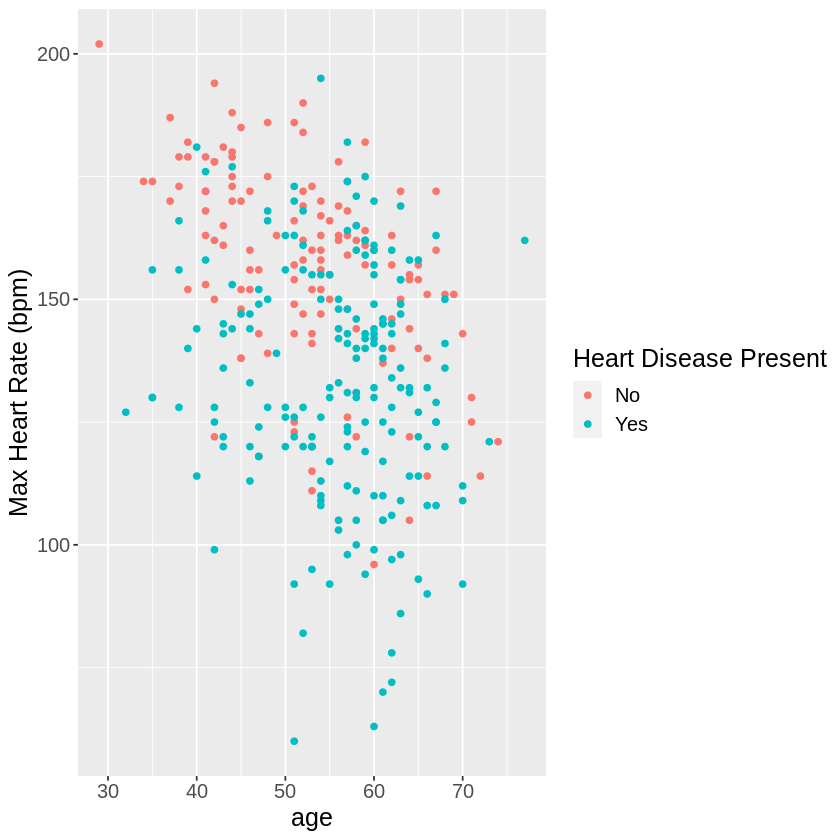

In [62]:
distribution_plot2 <- ggplot(places_training, aes(x =age, y = max_heart_rate, colour = heart_disease_present)) +
    geom_point() +
    xlab("age") +
    ylab("Max Heart Rate (bpm)") +
    labs(colour = "Heart Disease Present") +
    theme(text = element_text(size = 15))
distribution_plot2

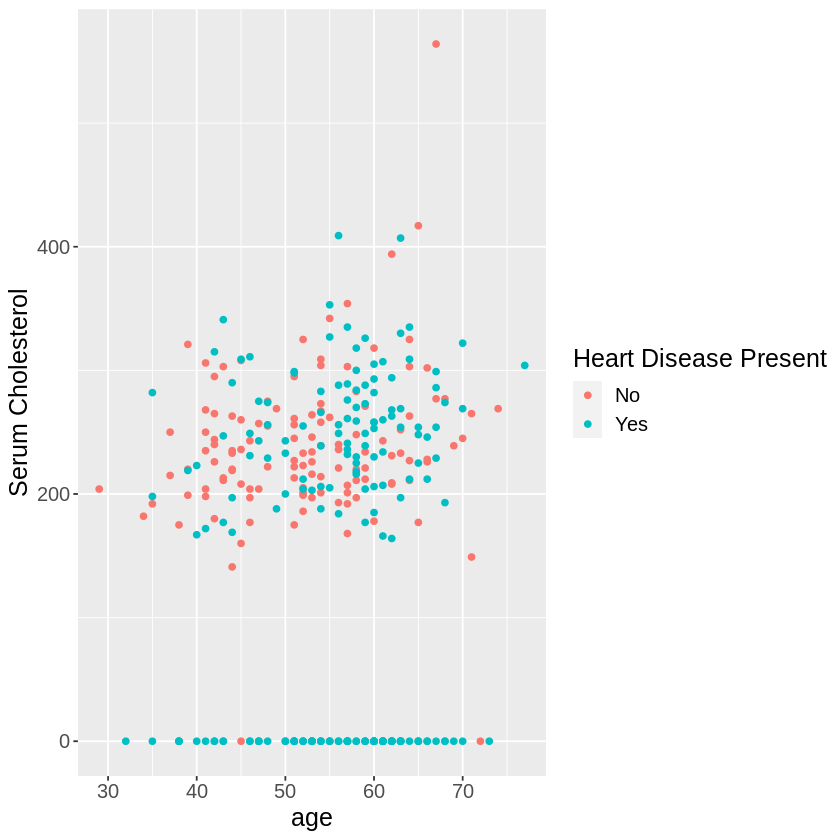

In [63]:
distribution_plot3 <- ggplot(places_training, aes(x =age, y = serum_cholesterol, colour = heart_disease_present)) +
    geom_point() +
    xlab("age") +
    ylab("Serum Cholesterol") +
    labs(colour = "Heart Disease Present") +
    theme(text = element_text(size = 15))
distribution_plot3

Warning message:
“Removed 1 rows containing missing values (geom_point).”


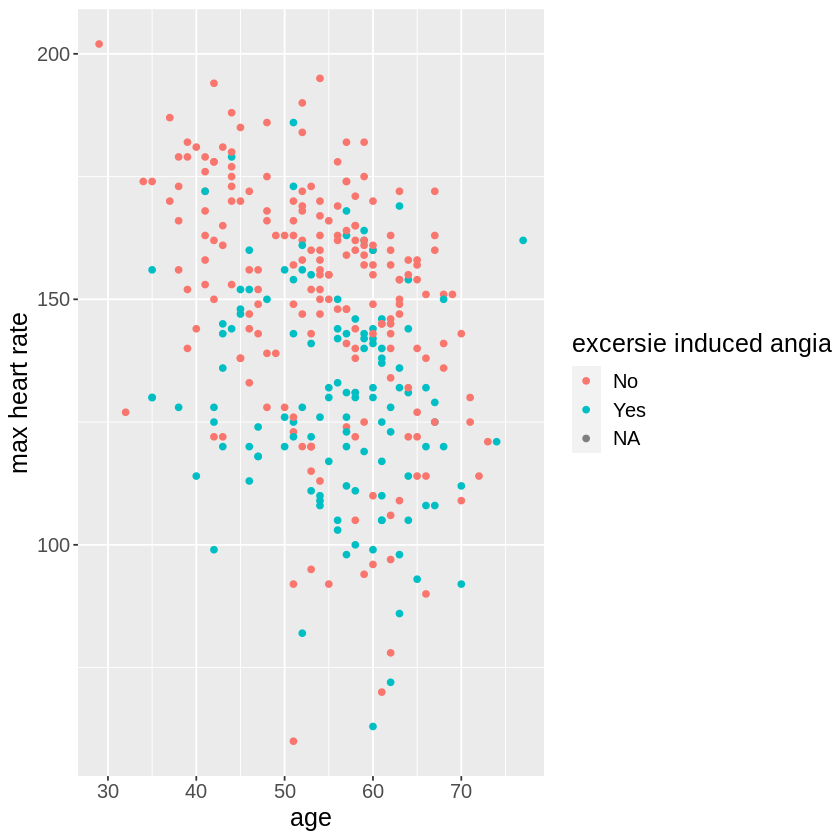

In [64]:
distribution_plot4 <- ggplot(places_training, aes(x =age, y = max_heart_rate, colour = exang)) +
    geom_point() +
    xlab("age") +
    ylab("max heart rate") +
    labs(colour = "excersie induced angia") +
    theme(text = element_text(size = 15))
distribution_plot4

Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


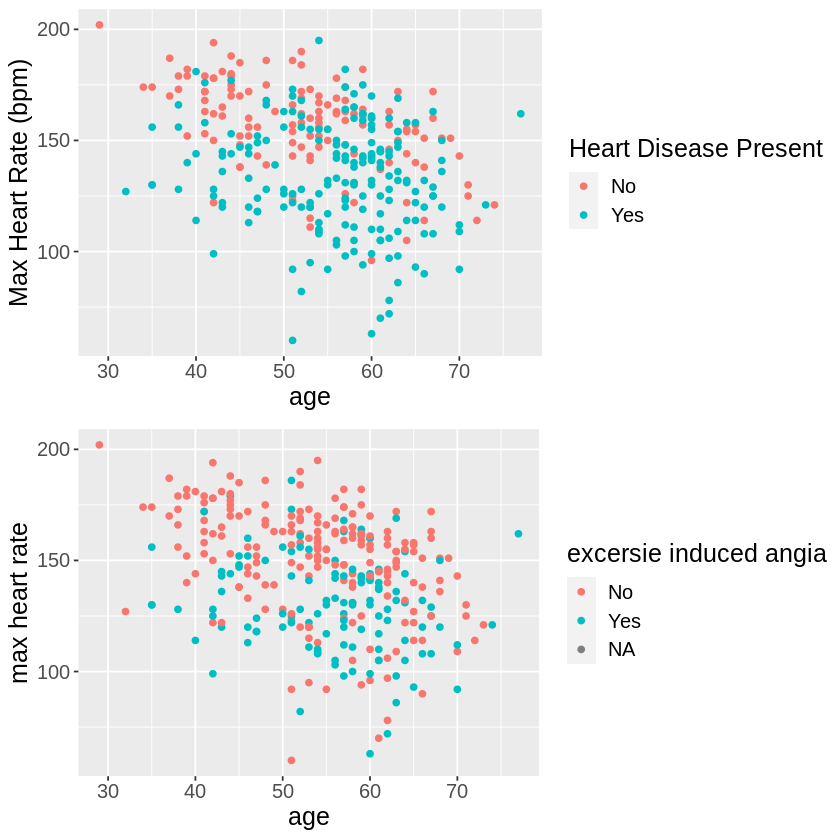

In [65]:
plot_grid(distribution_plot2, distribution_plot4, ncol = 1)

Notes:

*The sex representation in this dataset reflects how the data were historically collected and is not meant to imply that we believe that sex is binary.

Sources:

1- Wannamethee G., Shaper A. G. The association between heart rate and blood pressure, blood lipids and other cardiovascular risk factors. 1994. DOI: 10.1177/174182679400100307. Accessed on June 2023 through: https://pubmed.ncbi.nlm.nih.gov/7621302/

2- Heart Disease [data file]. DOI: 10.24432/C52P4X. Donated on 6/30/1988. Accessed on June 2023 through: https://archive.ics.uci.edu/dataset/45/heart+disease 
